**Imports necesarios**

In [58]:
import pandas as pd
import unicodedata
import contractions
import nltk
from nltk.corpus import stopwords
import re
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_curve, roc_auc_score, accuracy_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
import itertools

In [3]:
df = pd.read_csv('spam.csv', encoding='latin-1')

In [4]:
df

#df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

if "Unnamed: 2" in df.columns:
    df = df.drop(['Unnamed: 2'], axis=1)

if "Unnamed: 3" in df.columns:
    df = df.drop(['Unnamed: 3'], axis=1)

if "Unnamed: 4" in df.columns:
    df = df.drop(['Unnamed: 4'], axis=1)
    

new_csv_path = './new_dataset.csv'
df.to_csv(new_csv_path, index=False)

**Convirtiendo de mayúsculas a minúsculas**

In [5]:
df['v1'] = df['v1'].str.lower()
df['v2'] = df['v2'].str.lower()

#df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

if "Unnamed: 2" in df.columns:
    df = df.drop(['Unnamed: 2'], axis=1)

if "Unnamed: 3" in df.columns:
    df = df.drop(['Unnamed: 3'], axis=1)

if "Unnamed: 4" in df.columns:
    df = df.drop(['Unnamed: 4'], axis=1)

df

new_csv_path = './new_dataset.csv'
df.to_csv(new_csv_path, index=False)

**Quitando abreviaciones de las oraciones.**

In [6]:
# Expandiendo las contracciones en la columna 'v2'
df['v2'] = df['v2'].apply(lambda x: ' '.join([contractions.fix(word) for word in x.split()]))

new_csv_path = './new_dataset.csv'
df.to_csv(new_csv_path, index=False)

df

,v1,v2
0,ham,"go until jurong point, crazy.. available only ..."
1,ham,ok lar... joking wif you oni...
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,you dun say so early hor... you c already then...
4,ham,"nah i do not think he goes to usf, he lives ar..."
...,...,...
5567,spam,this is the 2nd time we have tried 2 contact y...
5568,ham,will ì_ b going to esplanade fr home?
5569,ham,"pity, * was in mood for that. so...any other s..."
5570,ham,the guy did some bitching but i acted like i w...


**Quitando acentos de las oraciones**

In [7]:
def removerAcentos(texto):
    texto = unicodedata.normalize('NFKD', texto).encode('ascii','ignore').decode('utf-8','ignore')
    return texto

df['v2'] = df['v2'].apply(removerAcentos)

new_csv_path = './new_dataset.csv'
df.to_csv(new_csv_path, index=False)

**Eliminando los stopwords**

In [8]:
nltk.download('stopwords')

# Definiendo la lista de stopwords en inglés
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    tokens = text.split()
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    return ' '.join(filtered_tokens)

df['v2'] = df['v2'].apply(remove_stopwords)

new_csv_path = './new_dataset.csv'
df.to_csv(new_csv_path, index=False)

df

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sebas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,v1,v2
0,ham,"go jurong point, crazy.. available bugis n gre..."
1,ham,ok lar... joking wif oni...
2,spam,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,dun say early hor... c already say...
4,ham,"nah think goes usf, lives around though"
...,...,...
5567,spam,2nd time tried 2 contact you. a750 pound prize...
5568,ham,i_ b going esplanade fr home?
5569,ham,"pity, * mood that. so...any suggestions?"
5570,ham,guy bitching acted like would interested buyin...


**Eliminando caracteres especiales**

In [9]:
def removerCaracteresEspecialesNumerosSimbolos(texto, removerDigitos=False):
    patron = r'[^a-zA-Z0-9\s]' if not removerDigitos else r'[^a-zA-Z\s]'
    texto = re.sub(patron, '', texto)
    return texto

def aplicar_removerCaracteresEspeciales(df, columna, removerDigitos=False):
    df[columna] = df[columna].apply(lambda x: removerCaracteresEspecialesNumerosSimbolos(x, removerDigitos))
    return df

df = aplicar_removerCaracteresEspeciales(df, 'v2')

new_csv_path = './new_dataset.csv'
df.to_csv(new_csv_path, index=False)

df

,v1,v2
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif oni
2,spam,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,dun say early hor c already say
4,ham,nah think goes usf lives around though
...,...,...
5567,spam,2nd time tried 2 contact you a750 pound prize ...
5568,ham,i b going esplanade fr home
5569,ham,pity mood that soany suggestions
5570,ham,guy bitching acted like would interested buyin...


**Generando otras características en el dataset**

**Stopwords únicas**

In [14]:
stop_words = set(stopwords.words('english'))

def calculate_feature(text):
    words = word_tokenize(text)
    unique_stopwords = len(set(w for w in words if w in stop_words))
    return unique_stopwords

df['Unique_Stopword_Count'] = df['v2'].apply(calculate_feature)

new_csv_path = './new_dataset.csv'
df.to_csv(new_csv_path, index=False)

**Cantidad de palabras**

In [15]:
def calculate_feature(text):
    words = word_tokenize(text)
    return len(words)

df['Word_Count'] = df['v2'].apply(calculate_feature)

new_csv_path = './new_dataset.csv'
df.to_csv(new_csv_path, index=False)

**Stopword count**

In [16]:
stop_words = set(stopwords.words('english'))

def calculate_feature(text):
    words = word_tokenize(text)
    stopword_count = len([w for w in words if w in stop_words])
    return stopword_count

df['Stopword_Count'] = df['v2'].apply(calculate_feature)

new_csv_path = './new_dataset.csv'
df.to_csv(new_csv_path, index=False)

**Stem count**

In [17]:
# Inicializar el stemmer
stemmer = PorterStemmer()

def calculate_feature(text):
    words = word_tokenize(text)
    stems = [stemmer.stem(word) for word in words]
    unique_stems = len(set(stems))
    return unique_stems

df['Unique_Stem_Count'] = df['v2'].apply(calculate_feature)

new_csv_path = './new_dataset.csv'
df.to_csv(new_csv_path, index=False)

**Palabras únicas**

In [18]:
def calculate_feature(text):
    words = word_tokenize(text)
    unique_words = len(set(words))
    return unique_words

df['Unique_Word_Count'] = df['v2'].apply(calculate_feature)

new_csv_path = './new_dataset.csv'
df.to_csv(new_csv_path, index=False)

**Palabras únicas en cara al conteo de palabras**

In [19]:
def calculate_feature(text):
    words = word_tokenize(text)
    unique_words = len(set(words))
    if len(words) == 0:
        return 0
    return unique_words / len(words)

df['Unique_Word_Count/Word_Count'] = df['v2'].apply(calculate_feature)

new_csv_path = './new_dataset.csv'
df.to_csv(new_csv_path, index=False)

**Modelos BoG y TF-IDF**

**Primer modelo**

**BoG**

In [20]:
data = pd.read_csv('spam.csv', encoding='latin-1')

messages = data["v2"].tolist()

# BoG con n=1
vectorizer_bog_1 = CountVectorizer()
bog_1_matrix = vectorizer_bog_1.fit_transform(messages)
bog_1_features = vectorizer_bog_1.get_feature_names_out()


# Ejemplos de mensajes en representación BoG (n=1)
print("Ejemplos de mensajes en representación BoG (n=1):")
for i in range(3):
    print(f"Mensaje {i + 1}:")
    print(bog_1_matrix[i])
    print()

Ejemplos de mensajes en representación BoG (n=1):
Mensaje 1:
  (0, 3550)	1
  (0, 8030)	1
  (0, 4350)	1
  (0, 5920)	1
  (0, 2327)	1
  (0, 1303)	1
  (0, 5537)	1
  (0, 4087)	1
  (0, 1751)	1
  (0, 3634)	1
  (0, 8489)	1
  (0, 4476)	1
  (0, 1749)	1
  (0, 2048)	1
  (0, 7645)	1
  (0, 3594)	1
  (0, 1069)	1
  (0, 8267)	1

Mensaje 2:
  (0, 5504)	1
  (0, 4512)	1
  (0, 4318)	1
  (0, 8392)	1
  (0, 5533)	1

Mensaje 3:
  (0, 4087)	1
  (0, 3358)	1
  (0, 2949)	2
  (0, 8447)	1
  (0, 2165)	1
  (0, 7756)	3
  (0, 8405)	1
  (0, 3087)	2
  (0, 2386)	1
  (0, 3207)	1
  (0, 7743)	1
  (0, 411)	1
  (0, 4930)	1
  (0, 402)	1
  (0, 7595)	1
  (0, 784)	1
  (0, 6297)	1
  (0, 6190)	1
  (0, 7230)	1
  (0, 7933)	1
  (0, 6242)	1
  (0, 1156)	1
  (0, 77)	1



In [30]:
# BoG con n=2
vectorizer_bog_2 = CountVectorizer(ngram_range=(2, 2))
bog_2_matrix = vectorizer_bog_2.fit_transform(messages)
bog_2_features = vectorizer_bog_2.get_feature_names_out()

print(len(bog_2_matrix.toarray()))


# Ejemplos de mensajes en representación BoG (n=2)
print("Ejemplos de mensajes en representación BoG (n=2):")
for i in range(3):
    print(f"Mensaje {i + 1}:")
    print(bog_2_matrix[i])
    print()

5572
Ejemplos de mensajes en representación BoG (n=2):
Mensaje 1:
  (0, 13507)	1
  (0, 36719)	1
  (0, 18446)	1
  (0, 27343)	1
  (0, 8361)	1
  (0, 4094)	1
  (0, 25625)	1
  (0, 16874)	1
  (0, 5782)	1
  (0, 14105)	1
  (0, 39933)	1
  (0, 19050)	1
  (0, 5778)	1
  (0, 7414)	1
  (0, 34180)	1
  (0, 13835)	1
  (0, 2345)	1

Mensaje 2:
  (0, 25061)	1
  (0, 19132)	1
  (0, 18398)	1
  (0, 39137)	1

Mensaje 3:
  (0, 12328)	1
  (0, 10753)	1
  (0, 17164)	1
  (0, 39667)	1
  (0, 7885)	1
  (0, 35678)	1
  (0, 39332)	1
  (0, 11169)	1
  (0, 8479)	1
  (0, 11548)	1
  (0, 35046)	1
  (0, 576)	1
  (0, 21018)	1
  (0, 560)	1
  (0, 32820)	1
  (0, 11170)	1
  (0, 35148)	1
  (0, 1133)	1
  (0, 35519)	1
  (0, 28398)	1
  (0, 10756)	1
  (0, 27940)	1
  (0, 31758)	1
  (0, 36461)	1
  (0, 28080)	1
  (0, 3274)	1



**TF-IDF**

In [22]:
data = pd.read_csv('spam.csv', encoding='latin-1')

messages = data["v2"].tolist()

# TF-IDF
vectorizer_tfidf = TfidfVectorizer()
tfidf_matrix = vectorizer_tfidf.fit_transform(messages)
tfidf_features = vectorizer_tfidf.get_feature_names_out()

print("Ejemplos de mensajes en representación TF-IDF:")
for i in range(3):
    print(f"Mensaje {i + 1}:")
    print(tfidf_matrix[i])
    print()

Ejemplos de mensajes en representación TF-IDF:
Mensaje 1:
  (0, 8267)	0.18238655630689804
  (0, 1069)	0.3264252905795869
  (0, 3594)	0.15318864840197105
  (0, 7645)	0.15566431601878158
  (0, 2048)	0.2757654045621182
  (0, 1749)	0.3116082237740733
  (0, 4476)	0.2757654045621182
  (0, 8489)	0.22080132794235655
  (0, 3634)	0.1803175103691124
  (0, 1751)	0.2757654045621182
  (0, 4087)	0.10720385321563428
  (0, 5537)	0.15618023117358304
  (0, 1303)	0.24415547176756056
  (0, 2327)	0.25279391746019725
  (0, 5920)	0.2553151503985779
  (0, 4350)	0.3264252905795869
  (0, 8030)	0.22998520738984352
  (0, 3550)	0.1481298737377147

Mensaje 2:
  (0, 5533)	0.5465881710238072
  (0, 8392)	0.4316010362639011
  (0, 4318)	0.5236458071582338
  (0, 4512)	0.4082988561907181
  (0, 5504)	0.27211951321382544

Mensaje 3:
  (0, 77)	0.23012628226525952
  (0, 1156)	0.16541257593676326
  (0, 6242)	0.16541257593676326
  (0, 7933)	0.12181446130331955
  (0, 7230)	0.1927133697047924
  (0, 6190)	0.17515550002890112
  (0, 

**Separación de datos**

In [23]:
# Dividiendo los datos en características (X) y etiquetas (y)
X = data["v2"]
y = data["v1"]

# Dividiendo los datos en conjuntos de entrenamiento y prueba (70% entrenamiento, 30% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Tamaño del conjunto de entrenamiento:", len(X_train))
print("Tamaño del conjunto de prueba:", len(X_test))

labels = data["v1"].tolist()
messages_train, messages_test, labels_train, labels_test = train_test_split(messages, labels, test_size=0.3, random_state=42)
print("Tamaño del conjunto de entrenamiento:", len(X_train))
print("Tamaño del conjunto de prueba:", len(X_test))

Tamaño del conjunto de entrenamiento: 3900
Tamaño del conjunto de prueba: 1672
Tamaño del conjunto de entrenamiento: 3900
Tamaño del conjunto de prueba: 1672


**Entrenamiento de modelos de ML**

In [46]:
# Representación BoG (n=1)
X_train_bog_1 = messages_train

# Representación BoG (n=1) para el conjunto de entrenamiento
X_train_bog_1 = vectorizer_bog_1.transform(messages_train)

# Representación BoG (n=1) para el conjunto de prueba
X_test_bog_1 = vectorizer_bog_1.transform(X_test)

# Representación BoG (n=2)
X_train_bog_2 = messages_train

# Representación BoG (n=2) para el conjunto de entrenamiento
X_train_bog_2 = vectorizer_bog_2.transform(messages_train)

# Representación BoG (n=2) para el conjunto de prueba
X_test_bog_2 = vectorizer_bog_2.transform(X_test)

# Representación TF-IDF para el conjunto de entrenamiento
X_train_tfidf = vectorizer_tfidf.transform(messages_train)

# Representación TF-IDF para el conjunto de prueba
X_test_tfidf = vectorizer_tfidf.transform(X_test)

In [61]:
# Plot de la matriz de confusión
def plot_confusion_matrix(cm, classes, normalize=False, title='Matriz de Confusión', cmap=plt.cm.Blues):
    """
    Esta función imprime y grafica la matriz de confusión.
    La normalización se puede aplicar estableciendo el argumento `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matriz de Confusión Normalizada")
    else:
        print('Matriz de Confusión sin Normalizar')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Etiqueta Verdadera')
    plt.xlabel('Etiqueta Predicha')
    plt.tight_layout()

**Random Forest**

**Representación BoG (n=1)**

Matriz de Confusión:
[[1452    1]
 [  41  178]]

Precision: 0.994413407821229
Accuracy: 0.9748803827751196
Recall: 0.8127853881278538
Curva ROC (AUC): 0.9823102571596477
Matriz de Confusión sin Normalizar
[[1452    1]
 [  41  178]]


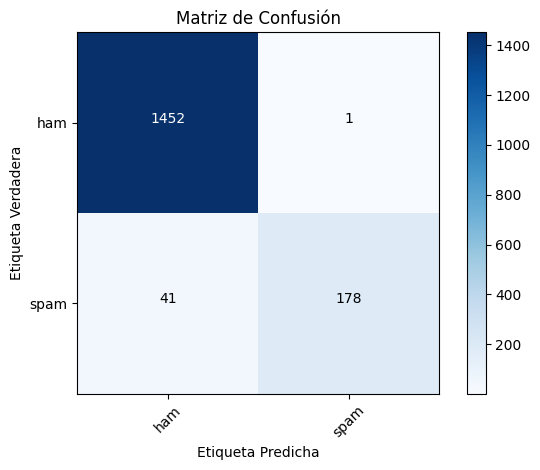

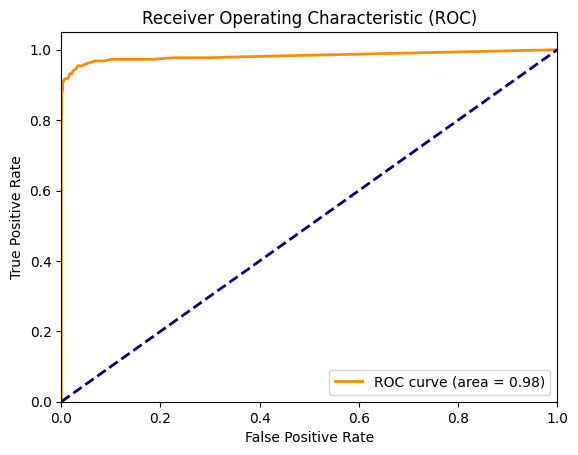

In [68]:
# Creando el modelo
rf_model = RandomForestClassifier()
rf_model.fit(X_train_bog_1, y_train)

# Predicción de los datos de prueba
y_pred = rf_model.predict(X_test_bog_1)

# Calculando métricas
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='spam')
recall = recall_score(y_test, y_pred, pos_label='spam')
probas = rf_model.predict_proba(X_test_bog_1)
accuracy = accuracy_score(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, probas[:, 1], pos_label='spam')
roc_auc = roc_auc_score(y_test, probas[:, 1])

# Resultados
print("Matriz de Confusión:")
print(conf_matrix)
print("\nPrecision:", precision)
print("Accuracy:", accuracy)
print("Recall:", recall)
print("Curva ROC (AUC):", roc_auc)

# Gráfica de la matriz de confusión
plt.figure()
plot_confusion_matrix(conf_matrix, classes=["ham", "spam"], normalize=False, title='Matriz de Confusión')
plt.show()

# Gráfica de la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

**Representación BoG (n=2)**

Matriz de Confusión:
[[1453    0]
 [  65  154]]

Precision: 1.0
Accuracy: 0.9611244019138756
Recall: 0.7031963470319634
Curva ROC (AUC): 0.9723466171391579
Matriz de Confusión sin Normalizar
[[1453    0]
 [  65  154]]


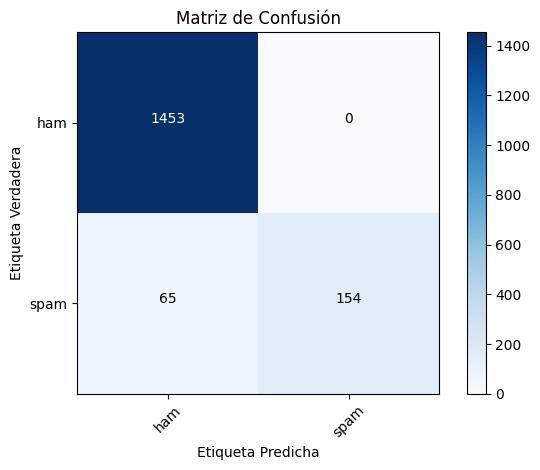

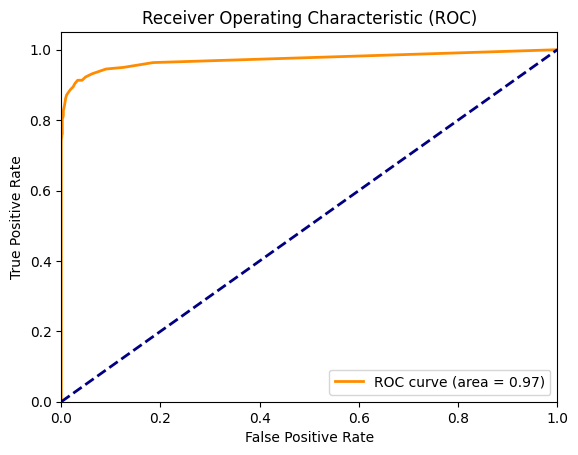

In [67]:
# Creando el modelo
rf_model = RandomForestClassifier()
rf_model.fit(X_train_bog_2, y_train)

# Predicción de los datos de prueba
y_pred = rf_model.predict(X_test_bog_2)

# Calculando métricas
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='spam')
recall = recall_score(y_test, y_pred, pos_label='spam')
accuracy = accuracy_score(y_test, y_pred)
probas = rf_model.predict_proba(X_test_bog_2)
fpr, tpr, _ = roc_curve(y_test, probas[:, 1], pos_label='spam')
roc_auc = roc_auc_score(y_test, probas[:, 1])

# Resultados
print("Matriz de Confusión:")
print(conf_matrix)
print("\nPrecision:", precision)
print("Accuracy:", accuracy)
print("Recall:", recall)
print("Curva ROC (AUC):", roc_auc)

# Gráfica de la matriz de confusión
plt.figure()
plot_confusion_matrix(conf_matrix, classes=["ham", "spam"], normalize=False, title='Matriz de Confusión')
plt.show()

# Gráfica de la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

**TF-IDF**

Matriz de Confusión (TF-IDF):
[[1453    0]
 [  43  176]]

Precision (TF-IDF): 1.0
Recall (TF-IDF): 0.8036529680365296
Curva ROC (AUC) (TF-IDF): 0.9841062578761622
Accuracy (TF-IDF): 0.9742822966507177
Matriz de Confusión sin Normalizar
[[1453    0]
 [  43  176]]


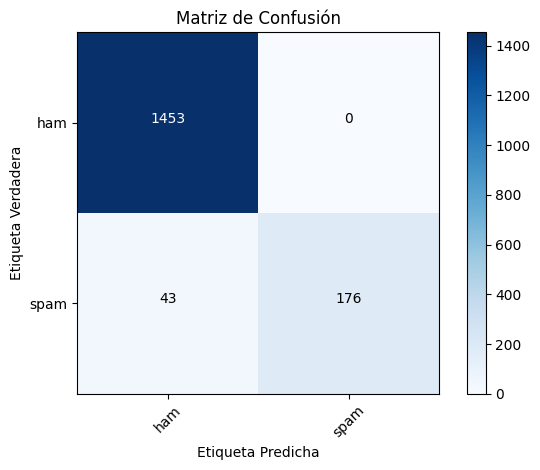

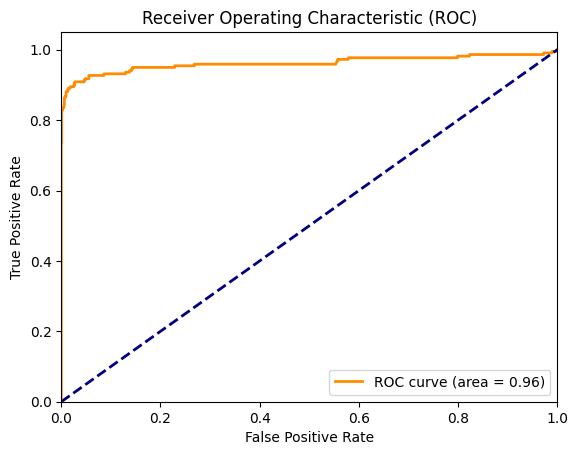

In [66]:
# Modelo de RandomForest con TF-IDF
rf_model_tfidf = RandomForestClassifier()
rf_model_tfidf.fit(X_train_tfidf, y_train)

# Realizando predicciones en el conjunto de prueba
y_pred_tfidf = rf_model_tfidf.predict(X_test_tfidf)

# Calculando métricas
conf_matrix_tfidf = confusion_matrix(y_test, y_pred_tfidf)
precision_tfidf = precision_score(y_test, y_pred_tfidf, pos_label='spam')
recall_tfidf = recall_score(y_test, y_pred_tfidf, pos_label='spam')
probas_tfidf = rf_model_tfidf.predict_proba(X_test_tfidf)
fpr_tfidf, tpr_tfidf, _ = roc_curve(y_test, probas[:, 1], pos_label='spam')
roc_auc_tfidf = roc_auc_score(y_test, probas_tfidf[:, 1])
accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)

# Resultados
print("Matriz de Confusión (TF-IDF):")
print(conf_matrix_tfidf)
print("\nPrecision (TF-IDF):", precision_tfidf)
print("Recall (TF-IDF):", recall_tfidf)
print("Curva ROC (AUC) (TF-IDF):", roc_auc_tfidf)
print("Accuracy (TF-IDF):", accuracy_tfidf)

# Gráfica de la matriz de confusión
plt.figure()
plot_confusion_matrix(conf_matrix_tfidf, classes=["ham", "spam"], normalize=False, title='Matriz de Confusión')
plt.show()


# Gráfica de la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

**Segundo modelo**

**Conversiones para mayor comodidad del modelo**

In [49]:
# Convertiendo las etiquetas 'spam' a 1 y 'ham' a 0 en el conjunto de entrenamiento
y_train_numeric = [1 if label == 'spam' else 0 for label in y_train]

# Convertiendo las etiquetas 'spam' a 1 y 'ham' a 0 en el conjunto de prueba
y_test_numeric = [1 if label == 'spam' else 0 for label in y_test]

**Representación BoG (n=1)**

Matriz de Confusión:
[[1452    1]
 [  44  175]]

Precision: 0.9943181818181818
Recall: 0.7990867579908676
Curva ROC (AUC): 0.9617073163066807
Matriz de Confusión sin Normalizar
[[1452    1]
 [  44  175]]


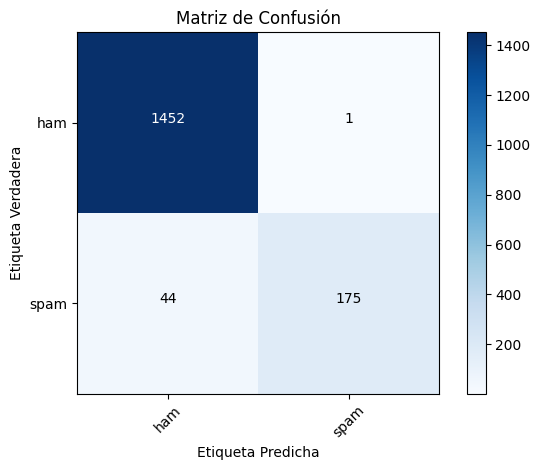

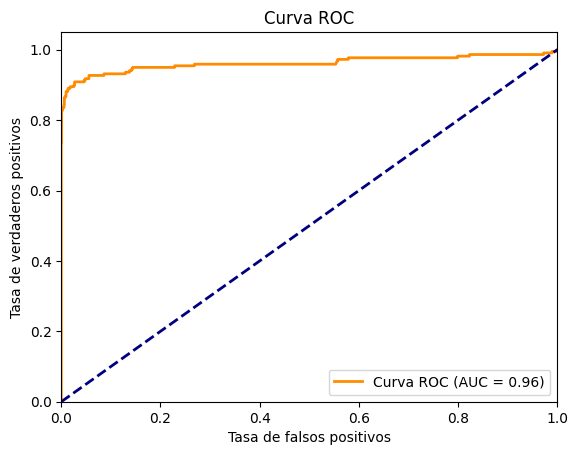

In [64]:
linear_model = LinearRegression()

linear_model.fit(X_train_bog_1, y_train_numeric)

y_pred_linear = linear_model.predict(X_test_bog_1)

y_pred_binary = (y_pred_linear >= 0.5).astype(int)

conf_matrix = confusion_matrix(y_test_numeric, y_pred_binary)

precision = precision_score(y_test_numeric, y_pred_binary)
recall = recall_score(y_test_numeric, y_pred_binary)

fpr, tpr, _ = roc_curve(y_test_numeric, y_pred_linear)
roc_auc = roc_auc_score(y_test_numeric, y_pred_linear)

print("Matriz de Confusión:")
print(conf_matrix)
print("\nPrecision:", precision)
print("Recall:", recall)
print("Curva ROC (AUC):", roc_auc)

plt.figure()
plot_confusion_matrix(conf_matrix, classes=["ham", "spam"], normalize=False, title='Matriz de Confusión')
plt.show()


# Gráfica la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

**Representación BoG (n=2)**

Matriz de Confusión:
[[1452    1]
 [  67  152]]

Precision: 0.9934640522875817
Recall: 0.6940639269406392
Curva ROC (AUC): 0.9656952864016191
Matriz de Confusión sin Normalizar
[[1452    1]
 [  67  152]]


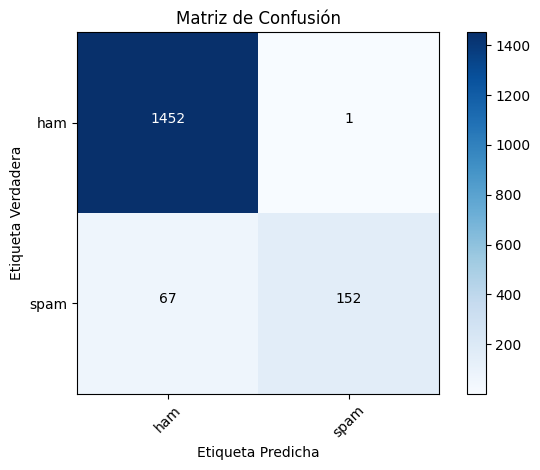

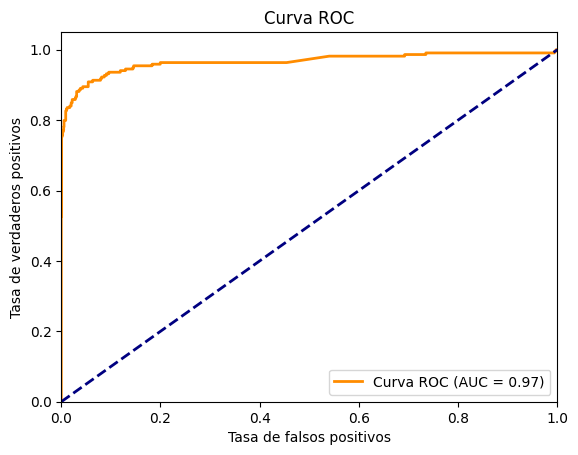

In [63]:
linear_model = LinearRegression()

linear_model.fit(X_train_bog_2, y_train_numeric)

y_pred_linear = linear_model.predict(X_test_bog_2)

y_pred_binary = (y_pred_linear >= 0.5).astype(int)

conf_matrix = confusion_matrix(y_test_numeric, y_pred_binary)

precision = precision_score(y_test_numeric, y_pred_binary)
recall = recall_score(y_test_numeric, y_pred_binary)

fpr, tpr, _ = roc_curve(y_test_numeric, y_pred_linear)
roc_auc = roc_auc_score(y_test_numeric, y_pred_linear)

print("Matriz de Confusión:")
print(conf_matrix)
print("\nPrecision:", precision)
print("Recall:", recall)
print("Curva ROC (AUC):", roc_auc)

plt.figure()
plot_confusion_matrix(conf_matrix, classes=["ham", "spam"], normalize=False, title='Matriz de Confusión')
plt.show()

# Gráfica la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

**Representación TF-IDF**

Matriz de Confusión:
[[1449    4]
 [  43  176]]

Precision: 0.9777777777777777
Recall: 0.8036529680365296
Curva ROC (AUC): 0.9609153789828633
Matriz de Confusión sin Normalizar
[[1449    4]
 [  43  176]]


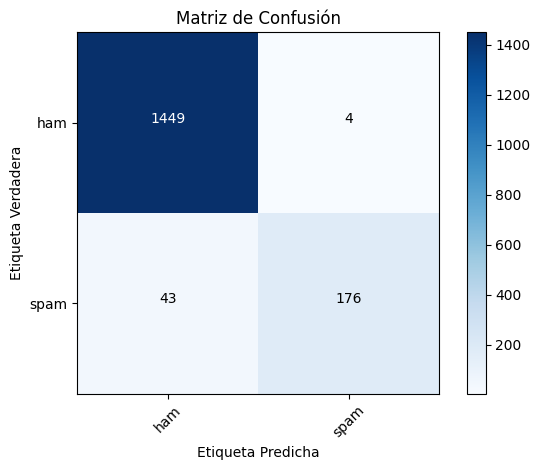

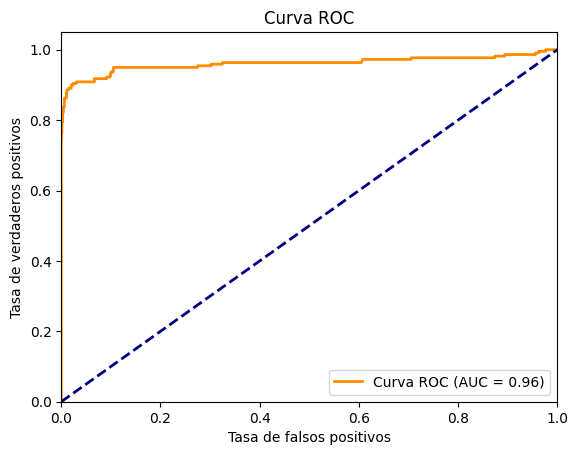

In [62]:
linear_model = LinearRegression()

linear_model.fit(X_train_tfidf, y_train_numeric)

y_pred_linear = linear_model.predict(X_test_tfidf)

y_pred_binary = (y_pred_linear >= 0.5).astype(int)

conf_matrix = confusion_matrix(y_test_numeric, y_pred_binary)

precision = precision_score(y_test_numeric, y_pred_binary)
recall = recall_score(y_test_numeric, y_pred_binary)

fpr, tpr, _ = roc_curve(y_test_numeric, y_pred_linear)
roc_auc = roc_auc_score(y_test_numeric, y_pred_linear)

print("Matriz de Confusión:")
print(conf_matrix)
print("\nPrecision:", precision)
print("Recall:", recall)
print("Curva ROC (AUC):", roc_auc)

# Graficando la matriz de confusión
plt.figure()
plot_confusion_matrix(conf_matrix, classes=["ham", "spam"], normalize=False, title='Matriz de Confusión')
plt.show()

# Gráfica la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

**Discusión**

1. **¿Qué error es más “aceptable”: dejar pasar un SMS de SPAM (falso negativo) o bloquear un SMS legítimo (falso positivo)? Justifique su respuesta.**
    - Es más "aceptable" dejar pasar un SMS de spam como falso negativo que bloquear un SMS legítimo (que se podría entender como un falso negativo), puesto que los SMS legítimos pueden tener infromación más crucial como lo puede ser información bancaria, códigos de verificación, mensajes de actualización de citas médicas, etc. Asimismo, es importante mencionar que los mensajes SMS no causan ningún daño en caso de ser ignorados.
2. **Compare los valores para cada modelo de representación numérico. En base a la respuesta de la primera pregunta ¿Qué modelo de representación numérica produjo el mejor resultado, BoG o TF-IDF? ¿Cuál o cuáles son las razones por las que dicho modelo se comportó de mejor manera?**
    - En base a los resultados obtenidos, se pudo notar que la representación numérica que mejores resultados produjo fue la de TF-IDF, puesto que no dan señales de sobreajuste. Asimismo, se puede notar que esta representación dio más resultados certeros que los modelos de BoG. La razón por la cual el modelo de TF-IDF se comportó mejor es porque posee cantidades proporcionales en todos los campos de la matriz de confusión. 
3. **En base a la exploración de datos e ingeniería de características que realizó en el primer y este laboratorio, ¿qué consejos le daría a un familiar que le solicita ayuda para detectar si un email o SMS es phishing o no? ¿En qué características de una URL/email podría fijarse su familiar para ayudarlo a detectar un potencial phishing?**
    - Los consejos que se le podrían dar a un familiar al momento de estarle dando ayuda para detectar pishing es que se haga especial atención a los caracteres especiales que contiene el mensaje que presenta el correo. Asimismo, le diría que haga especial énfasis en los "stopwords" de los mensajes que presentan los correos. Finalmente, le diría que preste especial atención en todos los signos de puntuación, faltas de ortografía, etc. con esto también le diría al familiar que se fije en las longitudes del correo emisor, puesto que por lo general, las empresas tienen un nombre limpio de caracteres especiales y de números.
4. **Si detectamos una URL o email/SMS de phishing, ¿qué podemos hacer para detener su distribución?**
    - Lo mejor que se puede hacer para poder detener su distribución sería no interactuar con él, puesto que podríamos perder una cantidad de información significativa y valiosa. También es importante mencionar que sería bastante recomendable y útil que se pueda informar a la entidad afectada para que ésta pueda emitir una campaña de conscientización para informar a sus usuarios que no abran o contesten los correos falsos. Finalmente, es de suma recomendación que se le pueda informar a las autoridades para que tomen acciones legales en contra de las personas que están emitiendo los correos falsos.